In [38]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score




In [4]:
uploaded = files.upload()

Saving card_transdata.csv to card_transdata.csv


In [44]:
data= pd.read_csv("card_transdata.csv")

In [ ]:
# explore the dataset
data.head()



,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
data.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [ ]:
data.shape

(1000000, 8)

In [ ]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


from matplotlib import pyplot as plt
_df_0['distance_from_home'].plot(kind='hist', bins=20, title='distance_from_home')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['distance_from_last_transaction'].plot(kind='hist', bins=20, title='distance_from_last_transaction')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['ratio_to_median_purchase_price'].plot(kind='hist', bins=20, title='ratio_to_median_purchase_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['repeat_retailer'].plot(kind='hist', bins=20, title='repeat_retailer')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='distance_from_home', y='distance_from_last_transaction', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='distance_from_last_transaction', y='ratio_to_median_purchase_price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='ratio_to_median_purchase_price', y='repeat_retailer', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='repeat_retailer', y='used_chip', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['distance_from_home'].plot(kind='line', figsize=(8, 4), title='distance_from_home')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['distance_from_last_transaction'].plot(kind='line', figsize=(8, 4), title='distance_from_last_transaction')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['ratio_to_median_purchase_price'].plot(kind='line', figsize=(8, 4), title='ratio_to_median_purchase_price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['repeat_retailer'].plot(kind='line', figsize=(8, 4), title='repeat_retailer')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
data.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [ ]:
data.dtypes

,0
distance_from_home,float64
distance_from_last_transaction,float64
ratio_to_median_purchase_price,float64
repeat_retailer,float64
used_chip,float64
used_pin_number,float64
online_order,float64
fraud,float64


In [ ]:
# check if there are any missing values in the dataset! there are no missing values
missing_values = data.isnull().any(axis=1)
print("Rows with missing values")
print(missing_values)

Rows with missing values
0         False
1         False
2         False
3         False
4         False
          ...  
999995    False
999996    False
999997    False
999998    False
999999    False
Length: 1000000, dtype: bool


In [ ]:
# check if there are any duplicates! There are no duplicates
duplicate_rows = data[data.duplicated()]
print("Duplicated rows:")
print(duplicate_rows)

Duplicated rows:
Empty DataFrame
Columns: [distance_from_home, distance_from_last_transaction, ratio_to_median_purchase_price, repeat_retailer, used_chip, used_pin_number, online_order, fraud]
Index: []


In [ ]:
chippindf= data[["used_chip", "used_pin_number", "fraud"]]

In [ ]:
total_transactions = len(chippindf)
total_fraud = chippindf["fraud"].sum()
fraud_by_chip = chippindf[chippindf["used_chip"]==1]["fraud"].sum()
fraud_by_pin = chippindf[chippindf["used_pin_number"]==1]["fraud"].sum()

In [ ]:
print("Total transactions:", total_transactions )
print("Total fraud cases:", total_fraud)
print("Fraud cases using chip: {} out of {}". format(fraud_by_chip ,total_transactions))
print("Fraud cases using pin: {} out of {}". format(fraud_by_pin ,total_transactions))



Total transactions: 1000000
Total fraud cases: 87403.0
Fraud cases using chip: 22410.0 out of 1000000
Fraud cases using pin: 273.0 out of 1000000


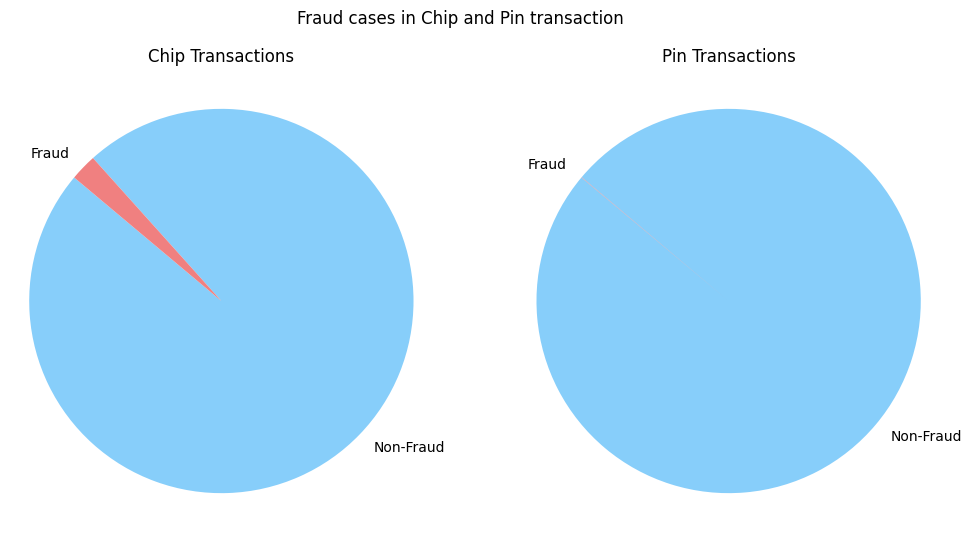

In [ ]:
# visulaize chip and pin transactions. Pin transaction methods are safer to use than chip transaction.
# Since the percentage of PIN transaction fraud is very small, it is hard to be seen on the pie chart

# Labels for the pie charts (Fraud and Non-Fraud)
labels_chip = ['Non-Fraud', 'Fraud']
labels_pin = ['Non-Fraud', 'Fraud']

# Data for the chip transactions (total transactions and fraud by chip)
sizes_chip = [total_transactions - fraud_by_chip, fraud_by_chip]

# Colors for chip transactions (Non-Fraud: LightSkyBlue, Fraud: LightCoral)
colors_chip = ['lightskyblue', 'lightcoral']

# Data for the pin transactions (total transactions and fraud by pin)
sizes_pin = [total_transactions - fraud_by_pin, fraud_by_pin]

# Colors for pin transactions (Non-Fraud: LightSkyBlue, Fraud: LightCoral)
colors_pin = ['lightskyblue', 'lightcoral']

# Create the figure with a size of 12x6
plt.figure(figsize=(12,6))

# Plot the first pie chart for chip transactions
plt.subplot(1, 2, 1) # Creates the first pie chart on the left side.
plt.pie(sizes_chip, labels=labels_chip, colors=colors_chip, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title("Chip Transactions")  # Title for chip transaction pie chart

# Plot the second pie chart for pin transactions
plt.subplot(1, 2, 2) # Creates the second pie chart for PIN transactions on the right side.
plt.pie(sizes_pin, labels=labels_pin, colors=colors_pin, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title("Pin Transactions")  # Title for pin transaction pie chart

# Add a super title for both charts
plt.suptitle('Fraud cases in Chip and Pin transaction')

# Show the plot
plt.show()



In [13]:
# This code identifies sequences of non-fraudulent transactions, interrupted by a fraud event,
# and stores these sequences. It then prints out the first 10 sequences where a fraud event interrupted a series of non-fraudulent transactions.

# The data frame consists of two columns: repeat_retailer and fraud
repeat_retailer_df = data[["repeat_retailer", "fraud"]]



# Initialize a list to store sequences of non-fraud transactions before a fraud occurs
fraud_sequences = []

# Initialize an empty list to track the current sequence of non-fraud transactions
current_sequence = []

# Iterate over each row in the dataframe
for index, row in repeat_retailer_df.iterrows():
    # Extract repeat_retailer (1 or 0) and fraud status (1 for fraud, 0 for no fraud) from the row
    repeat_retailer, is_fraud = row['repeat_retailer'], row['fraud']

    # Check if the current transaction is a fraud case
    if is_fraud == 1:
        # If a fraud is detected and there's an ongoing sequence, add it to fraud_sequences
        if current_sequence:
            fraud_sequences.append(current_sequence.copy())
        # Reset the current sequence after fraud
        current_sequence = []
    else:
        # If not fraud, append whether the retailer is repeated or not to the current sequence
        current_sequence.append('Repeat Retailer' if repeat_retailer == 1 else 'No Repeat Retailer')

# Loop over the first 10 sequences in fraud_sequences and print them in a readable format
for i, sequence in enumerate(fraud_sequences[:10], start=1):
    print(f"Fraud Sequence {i}: {', '.join(sequence)}")







Fraud Sequence 1: Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, No Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer
Fraud Sequence 2: Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, No Repeat Retailer, Repeat Retailer
Fraud Sequence 3: Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer
Fraud Sequence 4: Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer
Fraud Sequence 5: Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, No Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer
Fraud Sequence 6: Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer
Fraud Sequence 7: Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repe

In [14]:
# Create a DataFrame consisting of "ratio_to_median_purchase_price" and "fraud" columns
correlation_df = data[["ratio_to_median_purchase_price", "fraud"]]

# Calculate the correlation between the "ratio_to_median_purchase_price" and the "fraud" column
correlation = correlation_df["ratio_to_median_purchase_price"].corr(correlation_df["fraud"])
print(f"Correlation between transaction amount and fraud: {correlation}")

# The correlation between the ratio_to_median_purchase_price and fraud is 0.4623. This indicates a moderate positive correlation between the transaction amount (as a ratio to the median purchase price) and the likelihood of fraud.
# In other words, as the transaction amount increases relative to the median purchase price, there is a moderate tendency for fraud to occur more frequently.

Correlation between transaction amount and fraud: 0.4623047222882617


In [15]:


# Calculate the average ratio to median purchase price for non-fraudulent transactions
avgnonfraudtransaction = correlation_df[correlation_df["fraud"] == 0]["ratio_to_median_purchase_price"].mean()

# Calculate the average ratio to median purchase price for fraudulent transactions
avgfraudtransaction = correlation_df[correlation_df["fraud"] == 1]["ratio_to_median_purchase_price"].mean()

# Print the results
print(f"Average ratio to median purchase price for non-fraudulent transactions: {avgnonfraudtransaction}") # The average ratio of the transaction amount to the median purchase price for non-fraudulent transactions is 1.4236.
# This means that for non-fraudulent transactions, the transaction amounts are, on average, about 1.42 times the median purchase price.



print(f"Average ratio to median purchase price for fraudulent transactions: {avgfraudtransaction}") # The average ratio for fraudulent transactions is 6.0063.
# This suggests that for fraudulent transactions, the transaction amounts tend to be much larger, averaging around 6 times the median purchase price.
# This significant difference indicates that higher transaction amounts, relative to the median purchase price, are much more likely to be associated with fraudulent activity


Average ratio to median purchase price for non-fraudulent transactions: 1.423641855458059
Average ratio to median purchase price for fraudulent transactions: 6.006323490486969


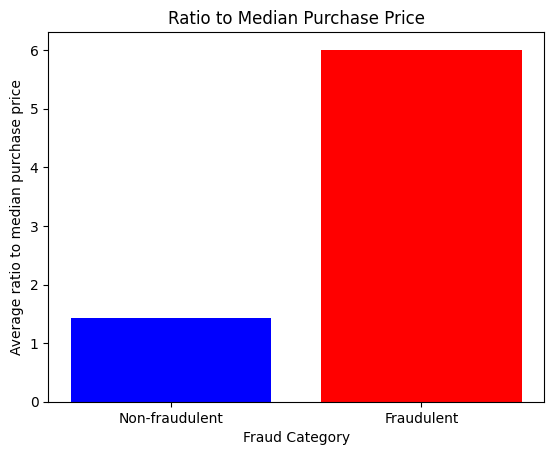

In [17]:
# Define the categories: Non-fraudulent and Fraudulent transactions
categories = ["Non-fraudulent", "Fraudulent"]

# Define the average ratios for non-fraudulent and fraudulent transactions
average_ratio = [avgnonfraudtransaction, avgfraudtransaction]

# Create a bar plot with the categories on the x-axis and the average ratio on the y-axis
plt.bar(categories, average_ratio, color=['blue', 'red'])

# Add a title to the plot
plt.title("Ratio to Median Purchase Price")

# Label the x-axis
plt.xlabel("Fraud Category")

# Label the y-axis
plt.ylabel("Average ratio to median purchase price")

# Show the plot
plt.show()


In [18]:
# Create a DataFrame with two columns: "online_order" and "fraud"
online_order_df = data[["online_order", "fraud"]]

# Calculate the total number of online orders (sum of the "online_order" column)
total_online_orders = online_order_df["online_order"].sum()

# Calculate the total number of online fraud cases (where both "online_order" and "fraud" are 1)
total_online_fraud = online_order_df[(online_order_df["fraud"] == 1) & (online_order_df["online_order"] == 1)]["fraud"].count()

# Calculate the fraud rate for online transactions (online fraud cases / total online orders)
fraud_rate_online = total_online_fraud / total_online_orders

# Calculate the total number of offline orders (total number of rows - total online orders)
total_offline_orders = len(online_order_df) - total_online_orders

# Calculate the total number of offline fraud cases (where "online_order" is 0 and "fraud" is 1)
total_offline_fraud = online_order_df[(online_order_df["online_order"] == 0) & (online_order_df["fraud"] == 1)]["fraud"].count()

# Calculate the fraud rate for offline transactions (offline fraud cases / total offline orders)
fraud_rate_offline = total_offline_fraud / total_offline_orders

# Print the fraud rate for online transactions, including the number of fraud cases and total transactions
print(f"Fraud rate for online transactions: {fraud_rate_online:.2%} ({total_online_fraud} cases out of {total_online_orders} online transactions)")

# Print the fraud rate for offline transactions, including the number of fraud cases and total transactions
print(f"Fraud rate for offline transactions: {fraud_rate_offline:.2%} ({total_offline_fraud} cases out of {total_offline_orders} offline transactions)")


Fraud rate for online transactions: 12.71% (82711 cases out of 650552.0 online transactions)
Fraud rate for offline transactions: 1.34% (4692 cases out of 349448.0 offline transactions)


In [20]:
# Conducting Feature Selection Analysis:

 X = data.drop("fraud", axis=1) # the dataset's fraud column (which is the target or label) is removed,
# and the remaining columns are used as features for the model. axis=1 means that the "fraud" column is being dropped from the DataFrame data.
# If axis=0 were used instead, it would attempt to drop rows instead of columns.


 y = data["fraud"] # The fraud column is kept as the target variable, which will be predicted by the model
# (whether a transaction is fraudulent or not).


# Splitting the Data:

# train_test_split: The dataset is split into training and testing sets with 80% of the data used for training
# (test_size=0.2 means 20% for testing). The random_state=42 ensures that the split is reproducible
# (i.e., it will give the same result every time).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier Initialization:

 rf_classifier = RandomForestClassifier(random_state=42) # A Random Forest Classifier is initialized with a random state
# to ensure reproducibility of results.


# Model Training:

 rf_classifier.fit(X_train, y_train) # The model is trained using the training data (X_train and y_train).
# This involves building multiple decision trees and combining their outputs to make predictions.


# Feature Importance Calculation:

# rf_classifier.feature_importances_: After training, the Random Forest model calculates the importance of each feature.
# This value represents how useful a particular feature is in predicting the target variable (fraud).
# pd.Series(...).sort_values(ascending=False): The feature importances are stored in a Pandas Series,
# sorted in descending order so that the most important features appear at the top.
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns).sort_values(ascending=False)


# The code prints out the ranked feature importances, allowing us see which features have the most influence
# on predicting whether a transaction is fraudulent.
print("Ranked Feature Importance:")
print(feature_importances)




Ranked Feature Importance:
ratio_to_median_purchase_price    0.527171
online_order                      0.169382
distance_from_home                0.134910
used_pin_number                   0.063928
used_chip                         0.052078
distance_from_last_transaction    0.045711
repeat_retailer                   0.006820
dtype: float64


In [29]:
# Finally it is time to build a credit card fraud detection model using random forest model

# Randomly sample one row (transaction) from the data, dropping the 'fraud' column
new_transaction_features = data.sample(1).drop("fraud", axis=1)

# Print the randomly sampled features for the new transaction
print("\nRandomly sampled features for new transaction:")
print(new_transaction_features)

# Use the trained Random Forest classifier to predict the label (fraud or legitimate) for the new transaction
prediction = rf_classifier.predict(new_transaction_features)

# Print the prediction result
print("\nPrediction for new transaction:")
# If the prediction is 1, it means fraud; if 0, it means legitimate
print("Fraud" if prediction[0] == 1 else "Legitimate")



Randomly sampled features for new transaction:
        distance_from_home  distance_from_last_transaction  \
663873            2.478117                         4.09218   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
663873                       10.923922              1.0        0.0   

        used_pin_number  online_order  
663873              0.0           1.0  

Prediction for new transaction:
Fraud


In [30]:
# Create a DataFrame with a new transaction's feature values
new_transaction_features1 = pd.DataFrame({
    'distance_from_home': [85],
    'distance_from_last_transaction': [75],
    'ratio_to_median_purchase_price': [5.1],
    'repeat_retailer': [0],
    'used_chip': [1],
    'used_pin_number': [0],
    'online_order': [0],
})

# Use the trained Random Forest classifier to predict the label for the new transaction
prediction = rf_classifier.predict(new_transaction_features1)

# Print the prediction result
print("\nPrediction for new transaction:")
# If the prediction is 1, it means fraud; if 0, it means legitimate
print("Fraud" if prediction[0] == 1 else "Legitimate")



Prediction for new transaction:
Fraud


In [45]:
# build a credit card fraud detection model using logistic regression

# Define the features (X) and the target (y)
X = data.drop("fraud", axis=1)  # Drop the 'fraud' column to use as features
y = data["fraud"]  # 'fraud' column as the target variable

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a StandardScaler to standardize the features
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Initialize a Logistic Regression model with a maximum of 1000 iterations
logreg_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Train the Logistic Regression model on the scaled training data
logreg_classifier.fit(X_train_scaled, y_train)

# Create a DataFrame for a new transaction with specific feature values
new_transaction_features1 = pd.DataFrame({
    'distance_from_home': [89],
    'distance_from_last_transaction': [15],
    'ratio_to_median_purchase_price': [2.3],
    'repeat_retailer': [0],
    'used_chip': [1],
    'used_pin_number': [1],
    'online_order': [1]
})

# Scale the new transaction features before prediction
prediction = logreg_classifier.predict(scaler.transform(new_transaction_features1))

# Print the prediction for the new transaction
print("\nPrediction for New Transaction:")
# If the prediction is 1, it's Fraud; otherwise, it's Legitimate
print("Fraud" if prediction[0] == 1 else "Legitimate")




Prediction for New Transaction:
Legitimate


In [46]:
# evaluating logestic regression model performance with precision, recall, and F1 score

# Use the trained logistic regression classifier to make predictions on the test data
y_pred = logreg_classifier.predict(X_test_scaled)

# Calculate precision, recall, F1 score, and accuracy
precision = precision_score(y_test, y_pred)  # Precision: Proportion of true positives out of all positive predictions
recall = recall_score(y_test, y_pred)        # Recall: Proportion of actual positives correctly identified
f1 = f1_score(y_test, y_pred)                # F1 Score: Harmonic mean of precision and recall
accuracy = accuracy_score(y_test, y_pred)    # Accuracy: Overall correctness of the predictions

# Print the evaluation metrics
print("\nEvaluation Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")





Evaluation Metrics:
Precision: 0.8915
Recall: 0.6001
F1 score: 0.7173
Accuracy: 0.9587


In [37]:
# build a credit card fraud detection model using support vector machine
# Read the CSV file "card_transdata.csv" into a DataFrame and randomly sample 1000 rows from the dataset becasue the initial dataset is huge and will take very long to run a svm model
data = pd.read_csv("card_transdata.csv").sample(1000, random_state=42)

X = data.drop("fraud", axis=1)
y = data["fraud"]

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the SVM classifier with a linear kernel and probability estimates
svm_classifier = SVC(kernel="linear", probability=True, random_state=42)

# Calibrate the SVM classifier to provide probability estimates
calibrated_svm = CalibratedClassifierCV(svm_classifier)
calibrated_svm.fit(X_scaled, y)

# Collect user input for the features of a new transaction
distance_from_home = float(input("Enter Distance From Home: "))
distance_from_last_transaction = float(input("Enter Distance From Last Transaction: "))
ratio_to_median_purchase_price = float(input("Enter Ratio to Median Purchase Price: "))
repeat_retailer = int(input("Enter repeat_retailer( 0 or 1) : "))
used_chip = int(input("Enter used_chip (0 or 1): "))
used_pin_number = int(input("Enter used pin number(0 or 1) : "))
online_order = int(input("Enter online order(0 or 1): "))

# Create a DataFrame for the new transaction using the provided input
new_transaction_features = pd.DataFrame({
    'distance_from_home': [distance_from_home],
    'distance_from_last_transaction': [distance_from_last_transaction],
    'ratio_to_median_purchase_price': [ratio_to_median_purchase_price],
    'repeat_retailer': [repeat_retailer],
    'used_chip': [used_chip],
    'used_pin_number': [used_pin_number],
    'online_order': [online_order]
})

# Scale the new transaction features using the same scaler
scaled_transaction = scaler.transform(new_transaction_features)

# Make a prediction using the calibrated SVM classifier
prediction = calibrated_svm.predict(scaled_transaction)

# Get the probability of the transaction being fraudulent
probability_of_fraud = calibrated_svm.predict_proba(scaled_transaction)[:, 1][0]

# Output the results
print("Prediction for new transaction:")
print("Fraud" if prediction[0] == 1 else "Legitimate")
print(f"Probability of Fraud: {probability_of_fraud*100 :.2f}%")


Enter Distance From Home: 12
Enter Distance From Last Transaction: 55
Enter Ratio to Median Purchase Price: 69.8
Enter repeat_retailer( 0 or 1) : 0
Enter used_chip (0 or 1): 0
Enter used pin number(0 or 1) : 0
Enter online order(0 or 1): 1
Prediction for new transaction:
Fraud
Probability of Fraud: 100.00%
